In [308]:
import sys
!{sys.executable} -m pip install xgboost

In [1]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path_to_data = "./channels_data"
sub_channels = "subscribed_channels.csv"
all_files = os.listdir(path_to_data)

In [3]:
channel_file = all_files[21]
channel_title = channel_file.replace("_videos_stat.csv", "")
channel_data = pd.read_csv(f"{path_to_data}/{channel_file}")

In [4]:
channel_data

,Unnamed: 0,video_id,channel_id,publication_date,video_language,video_title,video_description,video_tags,view_count,like_count,comment_count
0,0,gsF-BQP-bQo,UChFur_NwVSbUozOcF_F2kMg,2022-01-06T20:00:11Z,en,How Many Minecraft Farms Fit in This Square?,"In this Mumbo Jumbo Minecraft redstone video, ...",How Many Minecraft Farms Fit in This Square?/M...,1922058,109717,4654
1,1,A8WZuDCAeLM,UChFur_NwVSbUozOcF_F2kMg,2021-12-30T20:00:02Z,en,11 Levels of Minecraft Door: From Noob to Pro,"In this Mumbo Jumbo Minecraft redstone video, ...",11 Levels of Minecraft Door/From Noob to Pro/N...,1987828,110797,4972
2,2,MSJ-YHmFxxQ,UChFur_NwVSbUozOcF_F2kMg,2021-12-22T18:30:18Z,en,Hermitcraft 8: FINALE - GOODBYE BOATEM,In this FINALE episode of Hermitcraft Season 8...,ideas/creative/build/survival/tutorial/How to/...,1468510,93694,7970
3,3,t9MFHMLZuBg,UChFur_NwVSbUozOcF_F2kMg,2021-12-18T20:00:09Z,en,Hermitcraft 8: Episode 35 - BLOW UP THE MOON,Thank you Audible for sponsoring the video! ht...,ideas/creative/build/survival/tutorial/How to/...,1631874,96233,5832
4,4,axihulynFyI,UChFur_NwVSbUozOcF_F2kMg,2021-12-11T20:00:01Z,en,Hermitcraft 8: Episode 33 - I LIED,"In this episode of Hermitcraft Season 8, Mumbo...",Hermitcraft 8: Episode 33 - I LIED/I LIED/Herm...,1755151,105404,6723
5,5,YvxyrKcAlUo,UChFur_NwVSbUozOcF_F2kMg,2021-12-07T21:54:26Z,en,Hermitcraft 8: Episode 32 - BASE DONE!,"In this episode of Hermitcraft Season 8, Mumbo...",Hermitcraft 8: Episode 32 - BASE DONE!/Hermitc...,1590059,99034,7870
6,6,4v1_eQy3pNE,UChFur_NwVSbUozOcF_F2kMg,2021-11-18T20:00:04Z,en,I made a Transforming Cave Base in Minecraft,"In this Mumbo Jumbo Minecraft redstone video, ...",I made a Transforming Cave Base in Minecraft/T...,1516860,96623,4256
7,7,Gq0qA9TA-n0,UChFur_NwVSbUozOcF_F2kMg,2021-11-15T21:30:01Z,en,Hermitcraft 8: Episode 29 - GIANT TEMPLE,"In this episode of Hermitcraft Season 8, Mumbo...",Hermitcraft 8: Episode 29 - THE TEMPLE/Hermitc...,2111045,133370,21483
8,8,YQb2oQSedvc,UChFur_NwVSbUozOcF_F2kMg,2021-11-12T21:00:26Z,en,Hermitcraft 8: Episode 28 - FINISH IT!,"In this episode of Hermitcraft, Mumbo finishes...",Hermitcraft/Hermitcraft 8: Episode 28 - FINISH...,2114696,120022,9799
9,9,f3WW-Q4LAug,UChFur_NwVSbUozOcF_F2kMg,2021-11-07T19:00:09Z,en,How much XP from 1 Million Minecraft Sculk Blo...,This Minecraft #Shorts video shows how Many le...,How much XP from 1 Million Sculk Blocks? #Shor...,4630118,287225,1976


In [5]:
def process_date(date_serie):
    date_serie = date_serie.str.replace("Z", "").str.split("T", expand = True)
    date_serie.columns = ["publication_date", "publication_hour"]
    
    day_of_week = []
    for v in date_serie["publication_date"].values:
        date = v.split("-")
        d = datetime.date(int(date[0]), int(date[1]), int(date[2])).strftime("%A")
        day_of_week.append(d)
    date_serie["day_of_week"] = day_of_week
    
    return date_serie


def continuous_hour(hour_serie):
    split_hour = hour_serie.str.split(":", expand = True)
    split_hour = split_hour.apply(lambda x: x.astype(int), axis = 1)
    return split_hour.iloc[:, 0] + (split_hour.iloc[:, 1] / 60)
       
    
date_df = process_date(channel_data["publication_date"])
channel_data = channel_data.drop(["publication_date"], axis = 1)
channel_data = pd.concat([channel_data, date_df], axis = 1)
channel_data["publication_date"] = channel_data["publication_date"].astype("datetime64")

channel_data["like_per_view"] = channel_data["like_count"] / channel_data["view_count"]
channel_data["comment_per_view"] = channel_data["comment_count"] / channel_data["view_count"]

channel_data["continuous_date"] = channel_data["publication_date"].apply(lambda x: x.to_julian_date())
channel_data["continuous_date"] = channel_data["continuous_date"].astype(int)

channel_data["continuous_hour"] = continuous_hour(channel_data["publication_hour"])

C:\Users\ronan\AppData\Local\Temp/ipykernel_3208/4147058012.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colmuns = ["publication_date"]
C:\Users\ronan\AppData\Local\Temp/ipykernel_3208/4147058012.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colmuns = ["publication_date"]
C:\Users\ronan\AppData\Local\Temp/ipykernel_3208/4147058012.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colmuns = ["publication_date"]


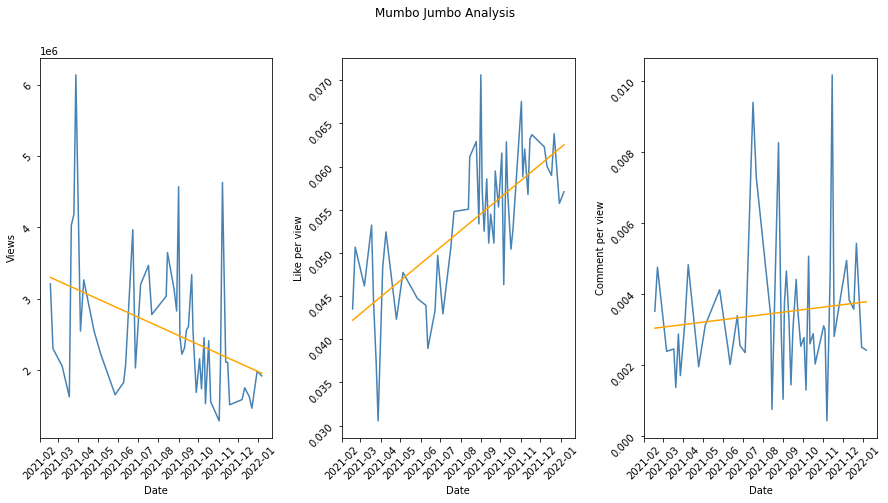

In [6]:
from sklearn.linear_model import LinearRegression

def lm_from_date(X, y):
    df = pd.DataFrame(X)
    df.colmuns = ["publication_date"]
    X = X.apply(lambda x: pd.Timestamp(x))
    X = X.apply(lambda x: x.to_julian_date())
    X = pd.DataFrame(X)

    lm = LinearRegression().fit(X, y)
    df["linear_regression"] = lm.predict(X)
    return df


fig, axes = plt.subplots(1, 3, sharex = True, figsize = (15, 7))
fig.suptitle(f"{channel_title} Analysis")

# Views dynamic
view_lm = lm_from_date(channel_data["publication_date"], channel_data["view_count"])

sns.lineplot(ax = axes[0],
             x = channel_data["publication_date"],
             y = channel_data["view_count"],
             color = "steelblue")
sns.lineplot(ax = axes[0],
             x = view_lm["publication_date"],
             y = view_lm["linear_regression"],
             color = "orange")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Views")
axes[0].tick_params(labelrotation=45)

# Like per view dynamic
like_per_view_lm = lm_from_date(channel_data["publication_date"], channel_data["like_per_view"])


sns.lineplot(ax = axes[1],
             x = channel_data["publication_date"],
             y = channel_data["like_per_view"],
             color = "steelblue")
sns.lineplot(ax = axes[1],
             x = like_per_view_lm["publication_date"],
             y = like_per_view_lm["linear_regression"],
             color = "orange")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Like per view")
axes[1].tick_params(labelrotation=45)

# Comment per view dynamic
comment_per_view_lm = lm_from_date(channel_data["publication_date"], channel_data["comment_per_view"])

sns.lineplot(ax = axes[2],
             x = channel_data["publication_date"],
             y = channel_data["comment_per_view"],
             color = "steelblue")
sns.lineplot(ax = axes[2],
             x = comment_per_view_lm["publication_date"],
             y = comment_per_view_lm["linear_regression"],
             color = "orange")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Comment per view")
axes[2].tick_params(labelrotation=45)

# Plot
fig.subplots_adjust(wspace=0.3)
plt.show()


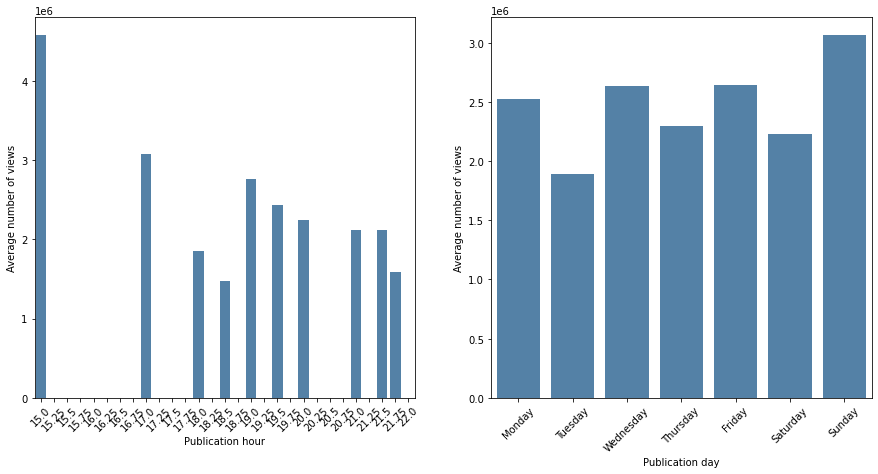

In [7]:
# Publication hour effect

# Average view count per 15min

min_publication_hour = np.floor(min(channel_data["continuous_hour"]))
max_publication_hour = np.ceil(max(channel_data["continuous_hour"]))
publication_range = np.arange(min_publication_hour, max_publication_hour + 0.25, 0.25)

average_view_per_class = []

for c in publication_range:
    videos_in_class = channel_data.loc[(channel_data["continuous_hour"] >= c) & (channel_data["continuous_hour"] < c + 0.25)]
    average_view_per_class.append(videos_in_class["view_count"].mean())

new_df = pd.DataFrame()
new_df["publication_class"] = publication_range
new_df["average_view"] = average_view_per_class
new_df["average_view"] = new_df["average_view"].fillna(0)

publication_day = channel_data.groupby("day_of_week").mean()

fig, axes = plt.subplots(1, 2, figsize = (15, 7))

plt.plot()
sns.barplot(x = "publication_class",
            y = "average_view",
            data = new_df,
            color = "steelblue",
            ax = axes[0])
axes[0].set_xlabel("Publication hour")
axes[0].set_ylabel("Average number of views")
axes[0].tick_params(axis = "x", rotation = 45)
plt.xticks(rotation = 45)

plt.plot()
sns.barplot(x = publication_day.index,
            y = publication_day["view_count"],
            color = "steelblue",
            order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            ax = axes[1])
axes[1].set_xlabel("Publication day")
axes[1].set_ylabel("Average number of views")
axes[1].tick_params(axis = "x", rotation = 45)
plt.xticks(rotation = 45)

plt.show()

In [8]:
# Can we predict the number of views ?

def create_title_features(title_serie):
    num_of_words = title_serie.str.split(" ").apply(lambda x: len(x))
    num_of_uppercase = title_serie.str.count(r'[A-Z]')
    num_of_character = title_serie.str.len()
    uppercase_proportion = num_of_uppercase / num_of_character
    
    return pd.DataFrame({
        "number_of_words": num_of_words,
        "uppercase_proportion": uppercase_proportion
    })

def get_interesting_tags(tags_serie):
    tags_split = tags_serie.str.split("/", expand = True)
    unique_tags = tags_split.apply(pd.Series.value_counts,axis=0).fillna(0).sum(axis = 1).sort_values(ascending = False)
    print(unique_tags)

title_features = create_title_features(channel_data["video_title"])

get_interesting_tags(channel_data["video_tags"])

channel_data = pd.concat([channel_data, title_features], axis = 1)




Mumbo                          27.0
Minecraft                      25.0
Hermitcraft                    19.0
Mumbo Jumbo                    17.0
Hermitcraft 8                  15.0
                               ... 
Minecraft fans                  1.0
From Noob to Pro                1.0
Minecraft furnace array         1.0
Minecraft guide to redstone     1.0
wireless redstone devices       1.0
Length: 694, dtype: float64


In [9]:
# Can we predict the views of a video ?

features = ["day_of_week", "continuous_hour", "number_of_words", "uppercase_proportion"]

categorical_features = ["day_of_week"]
quantitative_features = [f for f in features if f not in categorical_features]

X = channel_data[features]
y = channel_data["view_count"]

# X = pd.get_dummies(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
encoder = OneHotEncoder()

recode_X = ColumnTransformer(
    transformers = [
        ("num", scaler, quantitative_features),
        ("cat", encoder, categorical_features)
    ]
)

recode_X.fit(X_train)
X_train_std = recode_X.transform(X_train)
X_test_std = recode_X.transform(X_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train)

y_train_std = y_scaler.transform(y_train)
y_test_std = y_scaler.transform(y_test)

In [12]:
print(y_train_std.shape)

(37, 1)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

random_forest = RandomForestRegressor(random_state = 0)
svm = SVR()
lm = LinearRegression()
knn = KNeighborsRegressor()
xgb = XGBRegressor()

models = [
    random_forest,
    
    svm,
    
    lm,
    knn,
    xgb
]

for model in models:
    model.fit(X_train_std, y_train_std.ravel())
    # model.fit(X_train, y_train.ravel())

In [14]:
from sklearn.metrics import mean_absolute_error

mae = []

for model in models:
    predictions = model.predict(X_test_std)
    model_mae = mean_absolute_error(y_true = y_test_std, y_pred = predictions)
    
    # predictions = model.predict(X_test)
    # model_mae = mean_absolute_error(y_true = y_test, y_pred = predictions)
    
    mae.append(model_mae)
    print(f"Model MAE : {model_mae}")

Model MAE : 1.1751820443321515
Model MAE : 0.9708260929695502
Model MAE : 1.1471283623668502
Model MAE : 0.9046431568640126
Model MAE : 1.0950229847971402


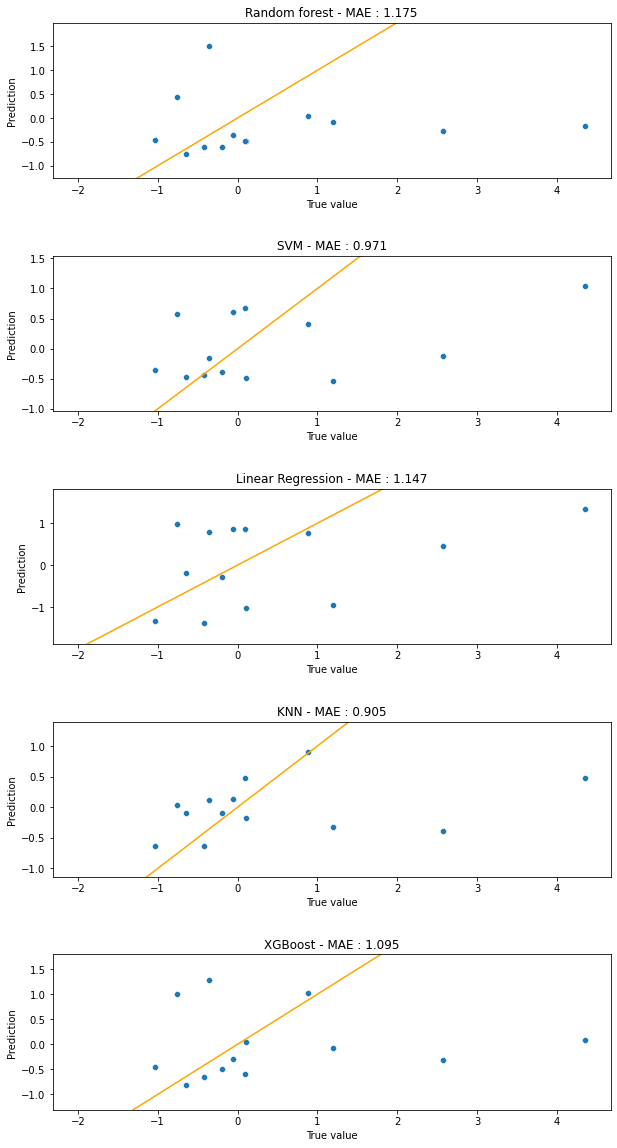

In [15]:
# Plot predictions

model_names = ["Random forest", "SVM", "Linear Regression", "KNN", "XGBoost"]

x_regression = np.linspace(-2, 3, 100)
# x_regression = np.linspace(0, 2e6, 100)
y_regression = x_regression


fig, axes = plt.subplots(5, 1, figsize = (10, 20))
i = 0

for model in models:
    predictions = model.predict(X_test_std)
    # predictions = model.predict(X_test)
    
    df_plot = pd.DataFrame({
        "True value": y_test_std[:, 0],
        "Prediction": predictions
    })
    
    plt.plot()
    sns.scatterplot(x = df_plot["True value"],
                    y = df_plot["Prediction"],
                    ax = axes[i])
    sns.lineplot(x = x_regression, y = y_regression, color = "orange", ax = axes[i])
    axes[i].set_title(f"{model_names[i]} - MAE : {round(mae[i], 3)}")
    axes[i].set_ylim((min(df_plot["Prediction"]) - 0.5, max(df_plot["Prediction"]) + 0.5))
    
    i += 1
    
fig.subplots_adjust(hspace=0.5)
plt.show()

In [16]:
transformer_columns = recode_X.transformers_[1][1].get_feature_names()
new_cols = quantitative_features

for col in transformer_columns:
    new_cols.append(col)
    
print(new_cols)

feature_importance = pd.DataFrame(random_forest.feature_importances_, index = new_cols)
print(feature_importance)

['continuous_hour', 'number_of_words', 'uppercase_proportion', 'x0_Friday', 'x0_Monday', 'x0_Saturday', 'x0_Sunday', 'x0_Thursday', 'x0_Tuesday', 'x0_Wednesday']
                             0
continuous_hour       0.101196
number_of_words       0.071719
uppercase_proportion  0.660008
x0_Friday             0.011073
x0_Monday             0.026462
x0_Saturday           0.003610
x0_Sunday             0.011830
x0_Thursday           0.010328
x0_Tuesday            0.013995
x0_Wednesday          0.089776


In [18]:
# Optimize model

from sklearn.model_selection import GridSearchCV

def optimize_random_forest(X_train, y_train):
    rff = RandomForestRegressor(random_state = 0)
    
    grid_params = {
        "n_estimators": [10, 20, 30, 50, 100, 200, 500, 1000],
        "min_samples_leaf": [1, 2, 4],
        "max_depth": [2, 5, 10, 20, 30, 50]
    }
    
    optimized_random_forest = GridSearchCV(
        estimator = rff,
        param_grid = grid_params,
        cv = 5
    )
    
    optimized_random_forest.fit(X_train, y_train)
    
    print(optimized_random_forest.best_params_)
    return optimized_random_forest
    
    
def optimize_SVM(X_train, y_train):
    svm = SVR()
    
    grid_params = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'poly', 'sigmoid']
    }
    
    optimized_svr = GridSearchCV(
        estimator = svm,
        param_grid = grid_params,
        cv = 5
    )
    
    optimized_svr.fit(X_train, y_train)
    
    print(optimized_svr.best_params_)
    return optimized_svr
    
optimized_rff = optimize_random_forest(X_train_std, y_train_std.ravel())
optimized_svm = optimize_SVM(X_train_std, y_train_std.ravel())

{'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 1000}
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


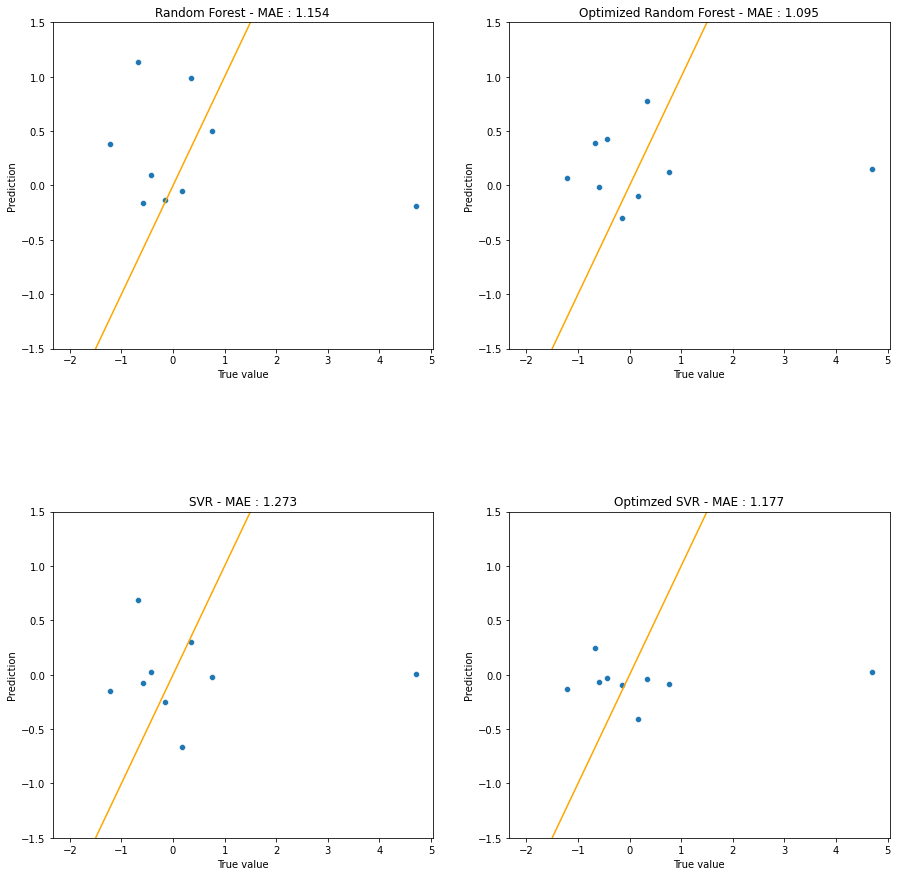

In [25]:
# Plot basic vs optimized models

model_names = ["Random Forest", "Optimized Random Forest",
               "SVR", "Optimzed SVR"]
plot_models = [random_forest, optimized_rff,
               svm, optimized_svm]

x_regression = np.linspace(-2, 3, 100)
# x_regression = np.linspace(0, 2e6, 100)
y_regression = x_regression


fig, axes = plt.subplots(2, 2, figsize = (15, 15))
i = 0

rows = [0, 0, 1, 1]
cols = [0, 1, 0, 1]


for model in plot_models:   
    predictions = model.predict(X_test_std)
    # predictions = model.predict(X_test)
    
    df_plot = pd.DataFrame({
        "True value": y_test_std[:, 0],
        "Prediction": predictions
    })
    
    plt.plot()
    sns.scatterplot(x = df_plot["True value"],
                    y = df_plot["Prediction"],
                    ax = axes[rows[i], cols[i]])
    sns.lineplot(x = x_regression, y = y_regression, color = "orange", ax = axes[rows[i], cols[i]])
    axes[rows[i], cols[i]].set_title(f"{model_names[i]} - MAE : {round(mae[i], 3)}")
    axes[rows[i], cols[i]].set_ylim((-1.5, 1.5))
    
    i += 1
    
fig.subplots_adjust(hspace=0.5)
plt.show()
